In [203]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree 
from sklearn import preprocessing
from io import StringIO
from IPython.display import Image, display
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Lectura de dataframes

In [240]:
df = pd.read_csv('salary.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Analisis de nulos por cada columna

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Breve conteo de datos

In [ ]:
df.columns

In [ ]:
df['workclass'].value_counts()

In [ ]:
df['education'].value_counts()

In [ ]:
df['marital-status'].value_counts()

In [ ]:
df['occupation'].value_counts()

In [ ]:
df['relationship'].value_counts()

In [ ]:
df['race'].value_counts()

In [ ]:
df['sex'].value_counts()

In [ ]:
df['native-country'].value_counts()

In [ ]:
df['salary'].value_counts()

## Correlaciones

In [63]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [64]:
columns_use = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [65]:
df.loc[ :, columns_use ].corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [66]:
corr_use = df.loc[ :, columns_use ].corr()

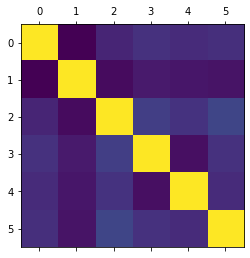

In [67]:
plt.matshow( corr_use )

<AxesSubplot:>

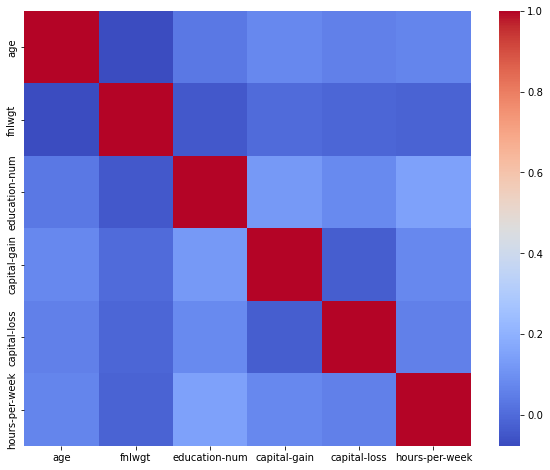

In [68]:
f, ax = plt.subplots( figsize=(10, 8) )

sns.heatmap( corr_use , cmap=sns.color_palette("coolwarm", as_cmap=True))

## Nuevo estudio profundizando otras columnas

In [69]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76fa9c880>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76fa9cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76fa9c4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76faac730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76faacac0>],
 'means': []}

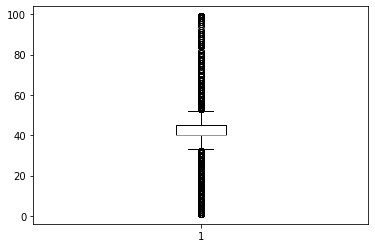

In [219]:
plt.boxplot( df['hours-per-week'] )

In [220]:
median = np.median(df['hours-per-week'])

In [221]:
df.loc[df['hours-per-week'] > 60 , 'hours-per-week'] = median
df.loc[df['hours-per-week'] <30 , 'hours-per-week'] = median

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76fb0d160>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76fb0d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76fafdd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76fb0dfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76fb19370>],
 'means': []}

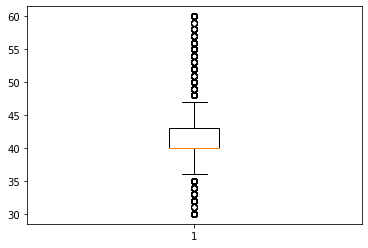

In [222]:
plt.boxplot( df['hours-per-week'] )

<AxesSubplot:>

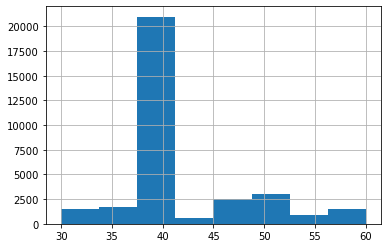

In [166]:
df['hours-per-week'].hist( bins = 8 )

In [ ]:
graf = df["workclass"].value_counts().reset_index()
graf.columns = ["workclass", "hours-per-week"]
graf

In [ ]:
sns.catplot(x="hours-per-week", y="workclass", kind="bar", data=graf, height=6, aspect=3)
plt.title('Hours/Week by Workclass',fontsize=16)

plt.grid(True)

## fnlwgt

In [228]:
medianf = np.median(df['fnlwgt'])

In [230]:
p99 = np.quantile (df['fnlwgt'] , .99)

In [231]:
df.loc[df['fnlwgt'] > p99 , 'fnlwgt'] = medianf

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76f9804f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76f980c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76f980160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76f98c3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76f98c730>],
 'means': []}

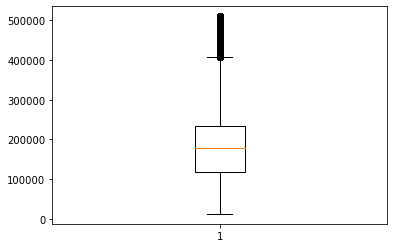

In [232]:
plt.boxplot( df['fnlwgt'] )

## education-num

In [233]:
medianed = np.median(df['education-num'])

In [234]:
df.loc[df['education-num'] < 5 , 'education-num'] = medianed

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76f9dddc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76f9ec520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76f9dda30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76f9ecc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76f9ecfd0>],
 'means': []}

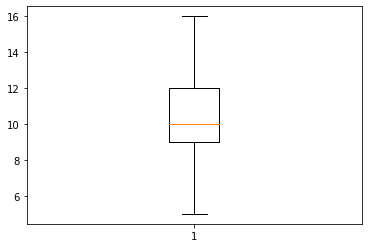

In [235]:
plt.boxplot( df['education-num'] )

## age

In [241]:
medianage = np.median(df['age'])

In [242]:
df.loc[df['age'] >75 , 'age'] = medianage

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7700d0a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7700de1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7700d06d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7700de8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7700dec70>],
 'means': []}

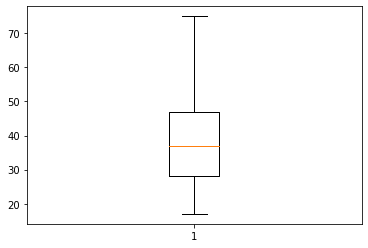

In [243]:
plt.boxplot( df['age'] )

## Analisis Exploratorio de datos

In [167]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [168]:
df.groupby( ["workclass"] ).agg( { "education" : ["count"] } ) / df.shape[0]

,education
,count
workclass,
?,0.056386
Federal-gov,0.029483
Local-gov,0.064279
Never-worked,0.000215
Private,0.697030
Self-emp-inc,0.034274
Self-emp-not-inc,0.078038
State-gov,0.039864


In [169]:
def print_bars( df , col  ):
    x  = df.groupby( [col] , as_index = False ).agg( { "sex" : ["count"] } ) 
    x.columns = x.columns.droplevel(1)
    x.columns = [col,'count']
    x = x.sort_values(["count"], ascending=False)
    plt.bar( x[col] , x['count'] )

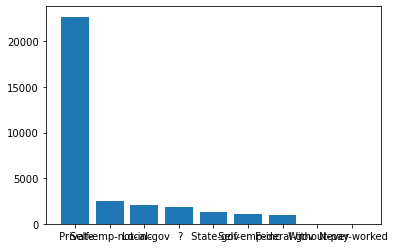

In [170]:
print_bars( df , "workclass" )

In [171]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

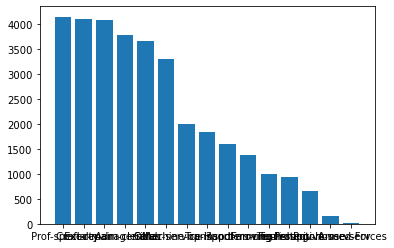

In [172]:
print_bars( df , "occupation" )

In [173]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

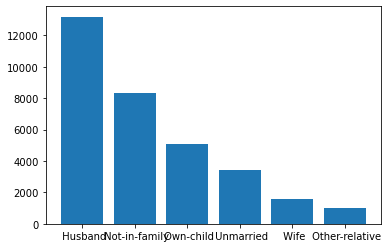

In [174]:
print_bars( df , "relationship" )

In [175]:
df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [176]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [177]:
df.loc[:,["relationship","salary"]]

,relationship,salary
0,Not-in-family,<=50K
1,Husband,<=50K
2,Not-in-family,<=50K
3,Husband,<=50K
4,Wife,<=50K
...,...,...
32556,Wife,<=50K
32557,Husband,>50K
32558,Unmarried,<=50K
32559,Own-child,<=50K


In [178]:
df.loc[:,["sex","salary"]].groupby(['sex','salary']).agg( { "sex" : ["count"] } ) 

sex
                count
sex     salary       
 Female  <=50K   9592
         >50K    1179
 Male    <=50K  15128
         >50K    6662

## Prueba de independencia mediante chi2

In [ ]:
df.groupby( ["occupation","salary","sex"] ).agg( { "sex" : ["count"] } )

In [ ]:
contigency1 = pd.crosstab( df['occupation'] , df['salary'] )

In [ ]:
contigency1

In [ ]:
plt.figure(figsize=(12,8))

In [ ]:
sns.heatmap( contigency1 , annot = True , cmap="YlGnBu" )

In [ ]:
c, p, dof, expected = chi2_contingency(contigency1)

In [ ]:
p

In [ ]:
contigency2 = pd.crosstab( df['occupation'] , df['sex'] )

In [ ]:
contigency2

In [ ]:
plt.figure(figsize=(12,8))

In [ ]:
sns.heatmap( contigency2 , annot = True , cmap="YlGnBu" )

In [ ]:
c, p, dof, expected = chi2_contingency(contigency1)

In [ ]:
p

## **Árboles de decisión**

In [ ]:
from sklearn import preprocessing
from sklearn import tree
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df.salary.value_counts().plot( kind='bar' , color=['r','b'] )

In [ ]:
df.head()

In [ ]:
df.loc[ pd.isna( df['workclass'] ) , :]

In [ ]:
df.loc [ pd.isnull( df['workclass']) , : ].shape[0] / df.shape[0]

In [ ]:
encoder_morethan50 = label_encoder.fit_transform ( df['salary'] ) 

In [ ]:
entrenamiento = df

In [ ]:
entrenamiento = entrenamiento.drop( ['education-num','marital-status','relationship','salary','hours-per-week'] , axis = 1)

In [ ]:
categorical_cols = [cname for cname in entrenamiento.columns if entrenamiento[cname].dtype == "object" ]
numerical_cols = [cname for cname in entrenamiento.columns if entrenamiento[cname].dtype != "object" ]

In [ ]:
union_cols = categorical_cols + numerical_cols

In [ ]:
dummie_encoded_train_predictors = pd.get_dummies(entrenamiento[union_cols])

In [ ]:
dummie_encoded_train_predictors.head()

In [ ]:
y_target = df['salary'].values
x = dummie_encoded_train_predictors.values

In [ ]:
y_target

In [ ]:
x

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x , y_target, test_size = .25, random_state = 1)

In [ ]:
arbol_a = tree.DecisionTreeClassifier()

In [ ]:
arbol_a = arbol_a.fit( x_train, y_train )

In [ ]:
arbol_a_precision = round(arbol_a.score(x_validation,y_validation),4)
print('Precision: %0.4f' % (arbol_a_precision))

In [ ]:
x_validation

In [ ]:
x

## **Regresión Lineal**

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [128]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [129]:
dfRe = df.copy()

In [130]:
dfRe['sal'] = dfRe['salary'].rank()

In [91]:
p99 = np.quantile (dfRe['age'] , .99)

In [92]:
promedio = np.mean(dfRe['age'])

In [131]:
median = np.median(dfRe['age'])

In [132]:
dfRe.loc[dfRe['age'] > 50 , 'age'] = median

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76bd900d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76bd907f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76bd80d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76bd90f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76bd9c2e0>],
 'means': []}

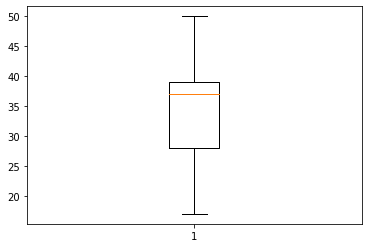

In [133]:
plt.boxplot(dfRe['age'])

In [108]:
p99 = np.quantile (dfRe['sal'] , .99)

In [134]:
median = np.median(dfRe['sal'])

In [148]:
dfRe.loc[dfRe['sal'] > 12600 , 'sal'] = median

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76df6b970>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76df790d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76df6b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76df797f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76df79b80>],
 'means': []}

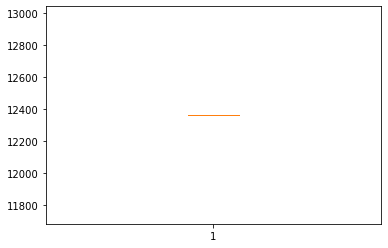

In [149]:
plt.boxplot(dfRe['sal'])

In [137]:
y = dfRe.loc[:, "sal" ].values 
x = dfRe.loc[:, ["age"] ].values

In [138]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x , y, test_size=0.2, random_state=0)

In [139]:
regression = LinearRegression()

In [140]:
regression.fit(X_Train, Y_Train)

LinearRegression()

In [141]:
regression.predict(X_Train)

array([12360.5, 12360.5, 12360.5, ..., 12360.5, 12360.5, 12360.5])

In [142]:
Y_Train

array([12360.5, 12360.5, 12360.5, ..., 12360.5, 12360.5, 12360.5])

In [143]:
regression.predict(X_Test)

array([12360.5, 12360.5, 12360.5, ..., 12360.5, 12360.5, 12360.5])

In [144]:
Y_Test

array([12360.5, 12360.5, 12360.5, ..., 12360.5, 12360.5, 12360.5])

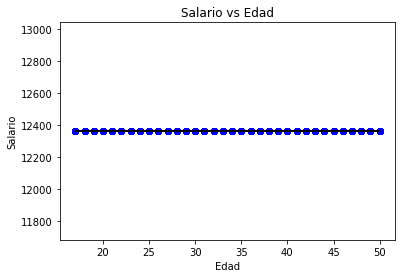

In [145]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('Salario vs Edad')
viz_train.xlabel("Edad")
viz_train.ylabel("Salario")
viz_train.show()

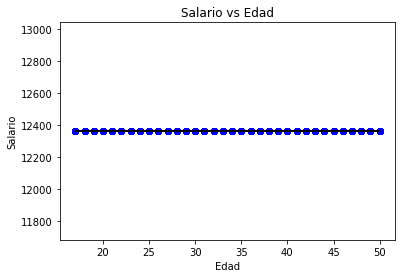

In [146]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = 'blue')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('Salario vs Edad')
viz_train.xlabel("Edad")
viz_train.ylabel("Salario")
viz_train.show()

In [147]:
regression.score(X_Test,Y_Test)

1.0

In [123]:
female = dfRe.loc[ dfRe['sex'].str.contains('Female')]
male = dfRe.loc[ dfRe['sex'].str.contains('Male')]

In [33]:
female['binario'] = pd.Series([1 for x in range(len(female.index))])
male['binario'] = pd.Series([0 for x in range(len(male.index))])

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_10876/2611349901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['binario'] = pd.Series([1 for x in range(len(female.index))])
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_10876/2611349901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['binario'] = pd.Series([0 for x in range(len(male.index))])


In [34]:
div = male.loc[0:10771,'binario']

In [35]:
div2 = dfRe.loc[0:10770,'sal']

In [36]:
X = div.values + female[["binario"]].values
Y = div2

In [37]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [38]:
regressor = LinearRegression()
regressor.fit(X_Train,Y_Train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [10]:
d = {'>50K': True, '<=50K': False}

In [13]:
dfRe['salary'].map(d)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32556    NaN
32557    NaN
32558    NaN
32559    NaN
32560    NaN
Name: salary, Length: 32561, dtype: object

In [ ]:
dfRe['salary'] = dfRe['salary'].map({'>50K': True, '<=50K': False})

In [12]:
dfRe["salary"] = pd.to_numeric(dfRe.salary, errors='coerce').isnull()

In [ ]:
dfRe.dtypes

In [ ]:
dfRe['salary'] = dfRe['salary']*1

In [ ]:
dfRe['salary'].value_counts()

In [17]:
female = dfRe.loc[ dfRe['sex'].str.contains('Female')]
male = dfRe.loc[ dfRe['sex'].str.contains('Male')]

In [ ]:
female['binario'] = pd.Series([1 for x in range(len(female.index))])
male['binario'] = pd.Series([0 for x in range(len(male.index))])

positive50['binario'] = pd.Series([1 for x in range(len(positive50.index))])
negative50['binario'] = pd.Series([1 for x in range(len(negative50.index))])

In [ ]:
div = male.loc[0:10771,'binario']


divp = positive50.loc[0:10770,'binario']
divn = negative50.loc[0:10770,'binario']

div2 = dfRe.loc[0:10770,'salary']